# Teaching Assistant Evaluations

Title: Teaching Assistant Evaluation

1. Sources:
   (a) Collector: Wei-Yin Loh (Department of Statistics, UW-Madison)
   (b) Donor:     Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:      June 7, 1997

2. Past Usage:
   1. Loh, W.-Y. & Shih, Y.-S. (1997). Split Selection Methods for 
      Classification Trees, Statistica Sinica 7: 815-840.
   2. Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of
      Prediction Accuracy, Complexity, and Training Time of
      Thirty-three Old and New Classification Algorithms. Machine
      Learning. Forthcoming.
      (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or
      (http://www.stat.wisc.edu/~limt/mach1317.pdf)

3. Relevant Information:
   The data consist of evaluations of teaching performance over three
   regular semesters and two summer semesters of 151 teaching assistant
   (TA) assignments at the Statistics Department of the University of
   Wisconsin-Madison. The scores were divided into 3 roughly equal-sized
   categories ("low", "medium", and "high") to form the class variable.

4. Number of Instances: 151

5. Number of Attributes: 6 (including the class attribute)

6. Attribute Information:
  
   1. Whether of not the TA is a native English speaker (binary)
      1=English speaker, 2=non-English speaker
   2. Course instructor (categorical, 25 categories)
   3. Course (categorical, 26 categories)
   4. Summer or regular semester (binary) 1=Summer, 2=Regular
   5. Class size (numerical)
   6. Class attribute (categorical) 1=Low, 2=Medium, 3=High

7. Missing Attribute Values: None


## Introduction

We'd like to evaluate--predict the score a teaching assistant(TA) receives--based on attributes such as whether the TA is a native English Speaker or not, the instructor the TA works with, the course the TA teaches, the semester in which the TA teaches, and the class size in which the TA is a part of. So, given these attributes, how well can our model evaluate a TA?

## Import Data

In [1]:
import pandas as pd #import pandas

In [2]:
ta = pd.read_csv('../input/ta-eval/TA_evaluation.data') #Read csv file

In [3]:
ta.head()

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


## Clean Data

In [4]:
ta.columns

Index(['1', '23', '3', '1.1', '19', '3.1'], dtype='object')

In [5]:
ta.columns = ['English Speaker', 'Instructor', 'Course','Semester','Class Size','Scores']
# Cleaned the data by changing column names

In [6]:
ta.head()

,English Speaker,Instructor,Course,Semester,Class Size,Scores
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [7]:
ta.tail()

,English Speaker,Instructor,Course,Semester,Class Size,Scores
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1
149,2,2,10,2,27,1


## Explore

In [8]:
round(ta.describe(),2) # provides stats on each numerical column values.

,English Speaker,Instructor,Course,Semester,Class Size,Scores
count,150.00,150.00,150.00,150.00,150.00,150.00
mean,1.81,13.58,8.14,1.85,27.93,2.01
std,0.39,6.81,7.03,0.35,12.92,0.82
min,1.00,1.00,1.00,1.00,3.00,1.00
25%,2.00,8.00,3.00,2.00,19.00,1.00
50%,2.00,13.00,4.50,2.00,27.00,2.00
75%,2.00,20.00,15.00,2.00,37.00,3.00
max,2.00,25.00,26.00,2.00,66.00,3.00


In [9]:
ta.columns # newly renamed column names

Index(['English Speaker', 'Instructor', 'Course', 'Semester', 'Class Size',
       'Scores'],
      dtype='object')

In [10]:
print(f'Data shape = {ta.shape}') # 150 records and 6 columns/attributes.

Data shape = (150, 6)


In [11]:
print(f'Data shape = {ta.Scores.shape}') # Target variable shape

Data shape = (150,)


In [12]:
print()
print('One-dimensional array representation for Scikit-Learn:')
print(f'ta.columns= ')
print(ta.columns)

print()
print('Some target values:')
print(f'ta.Scores[::35] =') 
ta.Scores[::35]


One-dimensional array representation for Scikit-Learn:
ta.columns= 
Index(['English Speaker', 'Instructor', 'Course', 'Semester', 'Class Size',
       'Scores'],
      dtype='object')

Some target values:
ta.Scores[::35] =


0      3
35     1
70     1
105    2
140    1
Name: Scores, dtype: int64

## Visualize the data

### Scores Based on Whether TA was a Native English Speaker or Not

<AxesSubplot:xlabel='English Speaker', ylabel='Scores'>

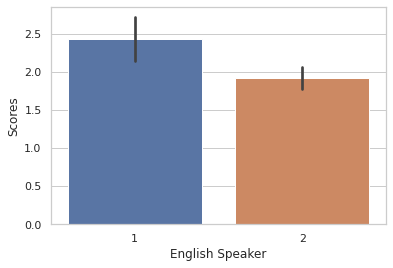

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt 

import seaborn as sns


sns.set(font_scale=1)
sns.set_style('whitegrid')
sns.barplot(data=ta,x='English Speaker',y='Scores')

### Scores given to each TA based on the Instructor of the course 

<AxesSubplot:xlabel='Instructor', ylabel='Scores'>

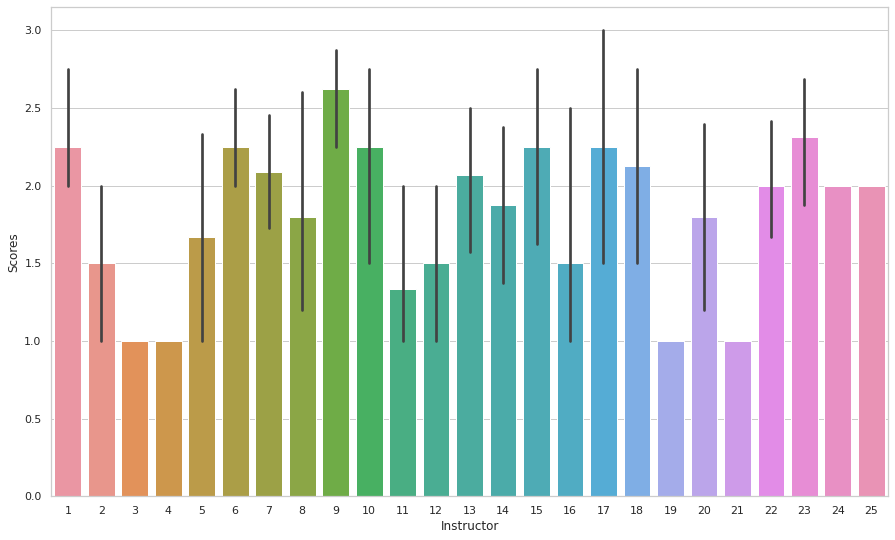

In [14]:
#We set the font, style, and then display the barchart 
sns.set(font_scale=1)
sns.set_style('whitegrid')
plt.figure(figsize=(15, 9))
sns.barplot(data=ta,x='Instructor',y='Scores')

### Scores given for each Course

<AxesSubplot:xlabel='Course', ylabel='Scores'>

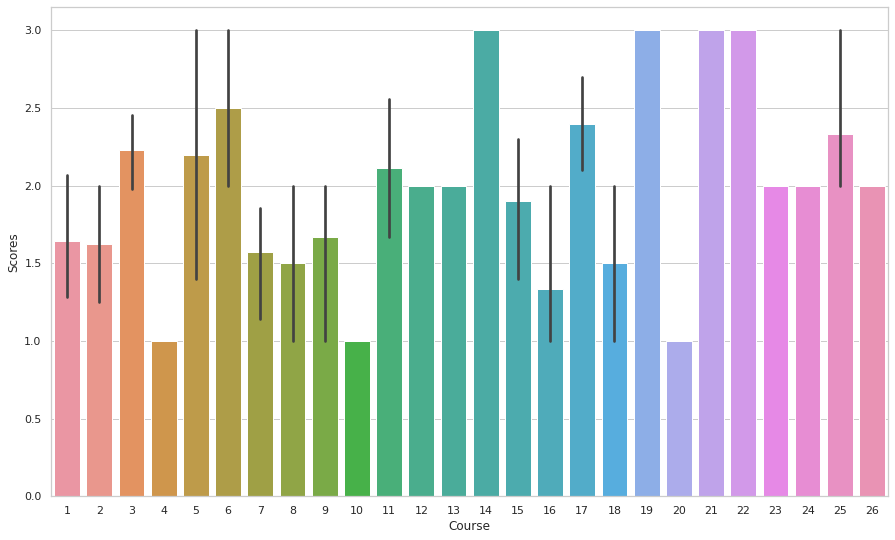

In [15]:
#We set the font, style, and display the bar chart

sns.set(font_scale=1)
sns.set_style('whitegrid')
plt.figure(figsize=(15, 9))
sns.barplot(data=ta,x='Course',y='Scores')

### Scores based on Semester

<AxesSubplot:xlabel='Semester', ylabel='Scores'>

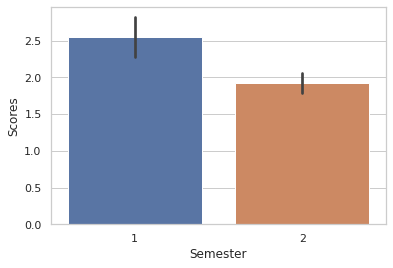

In [16]:
#Semester 1 shows that there are better scores than semester 2. 

sns.set(font_scale=1)
sns.set_style('whitegrid')
sns.barplot(data=ta,x='Semester',y='Scores')

### Scores based on Class Size

<AxesSubplot:xlabel='Class Size', ylabel='Scores'>

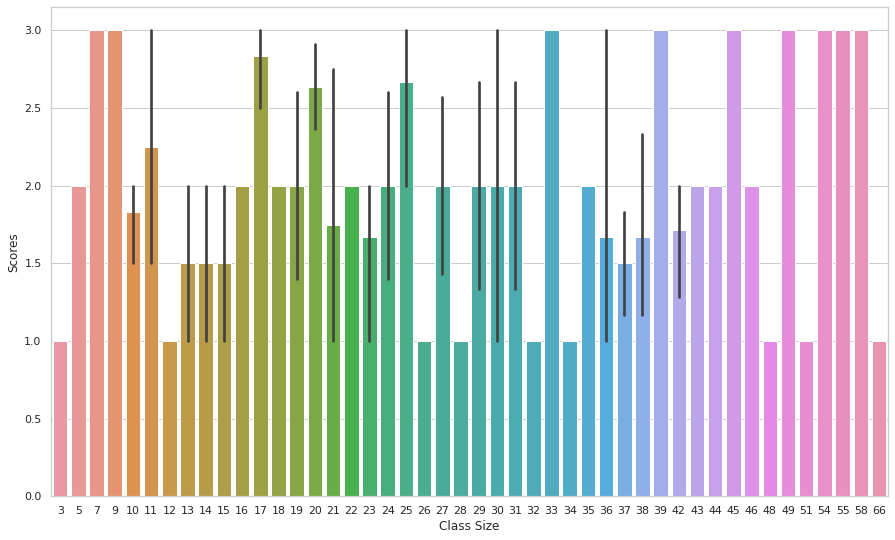

In [17]:
sns.set(font_scale=1)
plt.figure(figsize=(15, 9))
sns.set_style('whitegrid')
sns.barplot(data=ta,x='Class Size',y='Scores')

### Split the data for training and testing

In [18]:
from sklearn.model_selection import train_test_split 

arr_indp = ['English Speaker','Instructor','Course','Semester','Class Size']

X_train, X_test, y_train, y_test = train_test_split(ta[arr_indp], ta['Scores'], random_state=20, test_size= 0.15,
                                                   train_size= 0.85)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (127, 5)
X_test.shape  = (23, 5)

y_train.shape = (127,)
y_test.shape  = (23,)


### Create and train the k-nearest neighbors model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# selected k by square-rooting the sample size of our training data set/made sure k was an odd number too.
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(n_neighbors=11)

### Test the model by predicting Scores

In [20]:
predicted = knn.predict(X=X_test)
expected = y_test

print('First twenty predictions:')
print(f'predicted[:20] = {predicted[:20]}')
print(f'expected[:20] =') 
print(expected[:20])

First twenty predictions:
predicted[:20] = [1 1 2 2 2 3 1 1 3 2 1 2 2 2 2 3 2 2 3 2]
expected[:20] =
47     3
73     1
74     1
129    2
67     1
89     3
143    1
21     2
108    1
12     3
147    1
76     1
119    1
35     1
28     1
122    3
13     2
58     2
114    1
57     2
Name: Scores, dtype: int64


In [21]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[(1, 3), (2, 1), (2, 1), (1, 2), (3, 1), (2, 3), (2, 1), (2, 1), (2, 1), (2, 1), (3, 1)]


### Model prediction accuracy

In [22]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}') # Prints our prediction accuracy score

Prediction accuracy score = 52.17%


### Confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted) #prints our confusion matrix

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[5 6 2]
 [1 4 0]
 [1 1 3]]


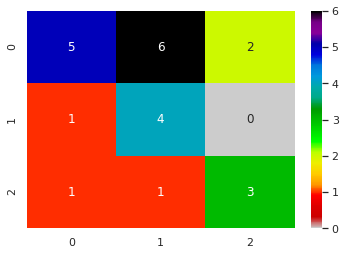

In [24]:
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(3), columns=range(3))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

### Classification report

In [25]:
from sklearn.metrics import classification_report

target_names = ['Score= 1','Score= 2', 'Score= 3']

names = [str(x) for x in target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

    Score= 1       0.71      0.38      0.50        13
    Score= 2       0.36      0.80      0.50         5
    Score= 3       0.60      0.60      0.60         5

    accuracy                           0.52        23
   macro avg       0.56      0.59      0.53        23
weighted avg       0.61      0.52      0.52        23



## Conclusion

We split our data 85% for training the model and the remaining 15% for testing -- resulted in our model predicting accuracy of 52.17%. 

So, how can we improve our model to accruately classify the scores of a TA (1=low, 2=medium, 3=high)?

We played around with various values of k and train/test proportions and decided that the current k value and  train/test proportions we have were most ideal when it came to the accuracy of our model. Also, the accuracy of the KNN model, generally speaking, is already very low to begin with compared to other classification models, with an average accuracy rate of 71.28% (Syaliman 2018). There's no general rule about the best k, it all depends on the nature of the data. We had 150 observations total to work with and used a k vaue of 11, which is pretty big; therefore, we can say that such a large k suggest that more irrelevant features, such as 'Semester', 'English Speaker', or even 'Course,' are involved when predicting the Scores of a TA.


REFERENCES:

https://iopscience.iop.org/article/10.1088/1742-6596/978/1/012047/pdf

https://bradleyboehmke.github.io/HOML/knn.html